In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import sklearn.metrics as metric
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import pickle

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [3]:
data = pd.DataFrame(data, columns=['weather', 'inform'])
data

,weather,inform
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [4]:
set_1=len(data[(data['weather']=="дождь") & (data['inform']==True)])
set_1

1

In [5]:
rain=len(data[data['weather'] == 'дождь'])
rain

3

In [6]:
rezult = set_1  / rain
rezult

0.3333333333333333

# Задание 2

In [7]:
data=pd.read_csv('neo_task.csv')
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


* id                   - ид объекта
* name                 - назване объекта
* est_diameter_min     - минимальный диаметр объекта
* est_diameter_max     - максимальный
* relative_velocity    - скорость объекта относительно Земли
* miss_distance        - расстояяние на которм объект пролител мимо Земли
* absolute_magnitude   - светимость объекта
* hazardous            - опасность 

# EDA :

In [8]:
data.isnull().sum()

id                    570
name                   46
est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88540 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  88540 non-null  float64
 1   name                88540 non-null  object 
 2   est_diameter_min    88540 non-null  float64
 3   est_diameter_max    88540 non-null  float64
 4   relative_velocity   88540 non-null  float64
 5   miss_distance       88540 non-null  float64
 6   absolute_magnitude  88540 non-null  float64
 7   hazardous           88540 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 5.5+ MB


Проверка на тип данных :

In [12]:
dict1 = {'True': '1', 'False': '0'}

data['hazardous']=data['hazardous'].astype(str)
data.loc[:, 'hazardous'] = data['hazardous'].map(dict1)
data

C:\Users\dimka\AppData\Local\Temp\ipykernel_7200\2063822956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hazardous']=data['hazardous'].astype(str)
C:\Users\dimka\AppData\Local\Temp\ipykernel_7200\2063822956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'hazardous'] = data['hazardous'].map(dict1)


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,0
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


In [13]:
data['hazardous']=data['hazardous'].astype(int)

C:\Users\dimka\AppData\Local\Temp\ipykernel_7200\1386524043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hazardous']=data['hazardous'].astype(int)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88540 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  88540 non-null  float64
 1   name                88540 non-null  object 
 2   est_diameter_min    88540 non-null  float64
 3   est_diameter_max    88540 non-null  float64
 4   relative_velocity   88540 non-null  float64
 5   miss_distance       88540 non-null  float64
 6   absolute_magnitude  88540 non-null  float64
 7   hazardous           88540 non-null  int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 5.7+ MB


Проверка на явные дубликаты:

In [15]:
data.duplicated().sum()

0

In [16]:
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,0
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


In [17]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
count,8.854000e+04,88540.000000,88540.000000,88540.000000,8.854000e+04,88540.000000,88540.000000
mean,1.437819e+07,0.127627,0.285382,48064.483960,3.707661e+07,23.526956,0.097086
std,2.086882e+07,0.300761,0.672523,25283.040460,2.234335e+07,2.895041,0.296077
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000,0.000000
25%,3.448917e+06,0.019256,0.043057,28629.622802,1.723104e+07,21.340000,0.000000
50%,3.748231e+06,0.048368,0.108153,44186.541009,3.786538e+07,23.700000,0.000000
75%,3.884015e+06,0.143402,0.320656,62922.414581,5.655106e+07,25.700000,0.000000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000,1.000000


In [18]:
set_save = data.drop(['name'], axis=1)
set_save = set_save.drop(['id'], axis=1)
set_save.to_csv('classification.csv')

In [19]:
set_save

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...
90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
90833,0.035039,0.078350,116288.999548,5.471396e+07,24.40,0
90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


Text(0.5, 1.0, 'Тепловая карта')

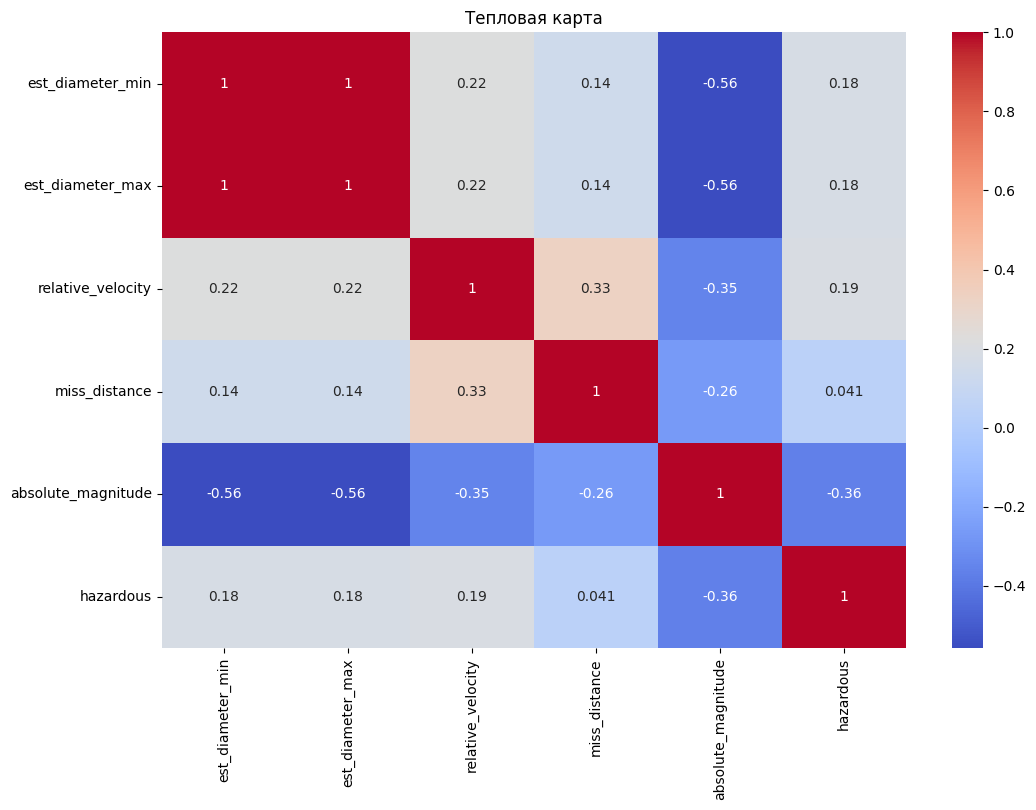

In [20]:
correct = ['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude','hazardous']
new_df = data[correct]
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта')


Text(0.5, 1.0, 'Парная диограмма')

<Figure size 1200x800 with 0 Axes>

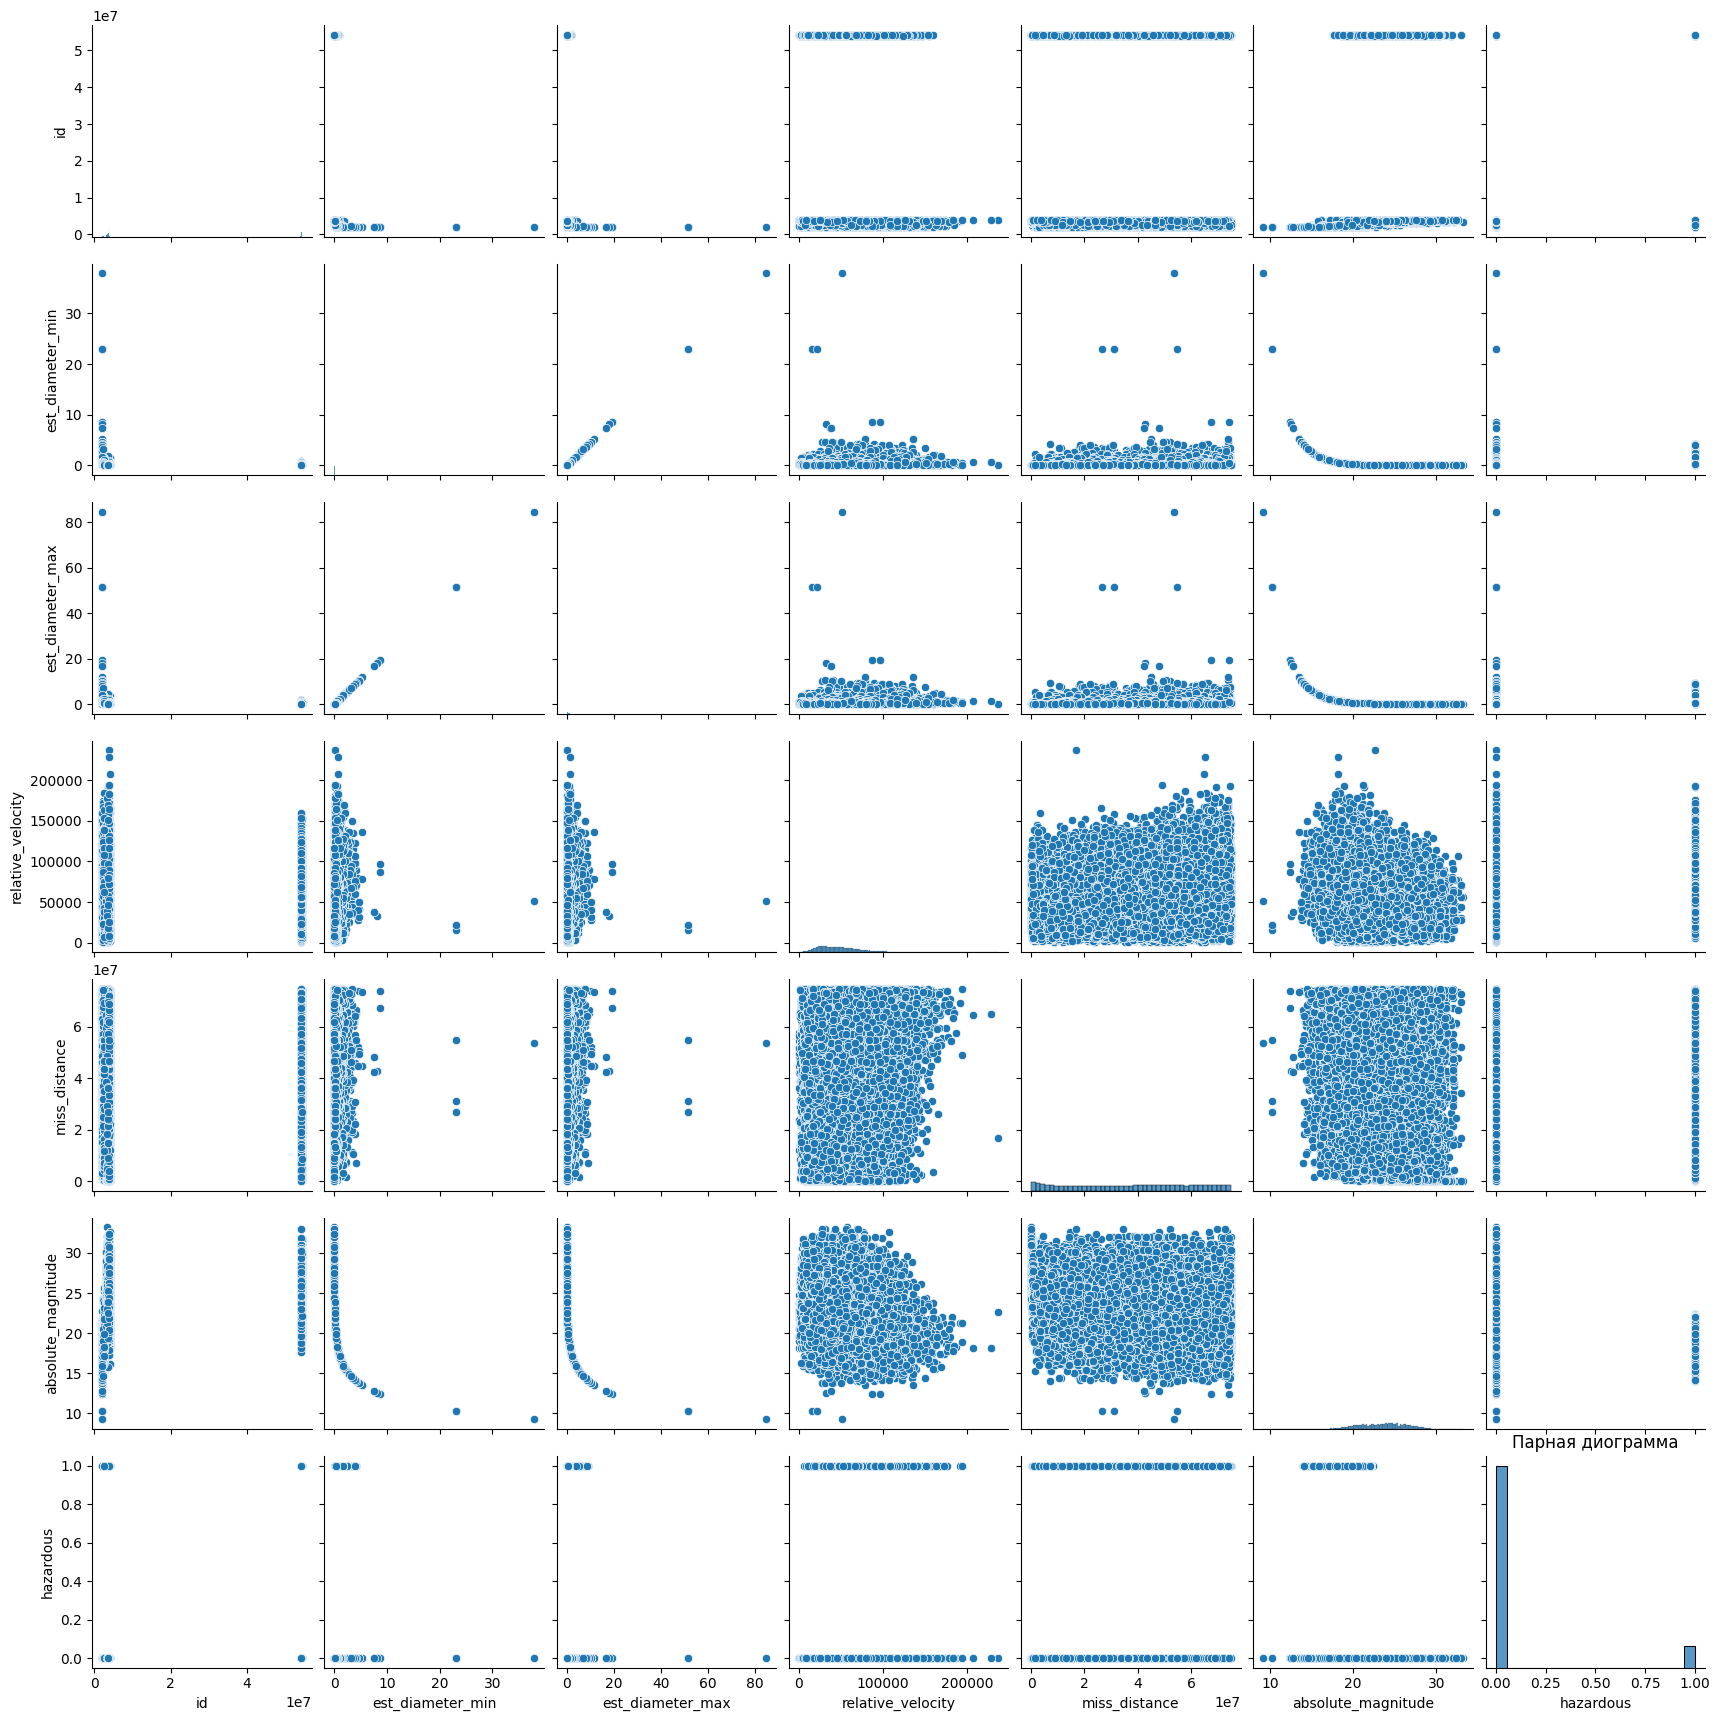

In [21]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=data)
plt.title('Парная диограмма')


Text(0.5, 1.0, 'hazardous')

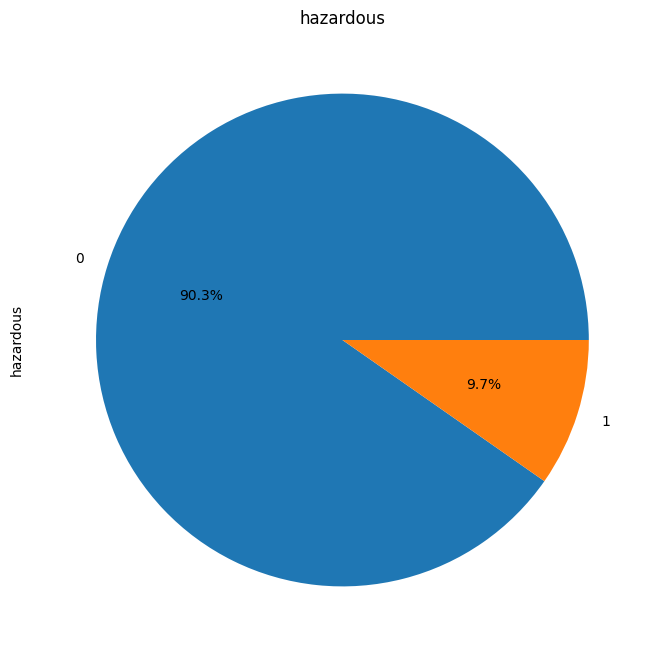

In [22]:
plt.figure(figsize=(8, 8))
data['hazardous'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('hazardous')

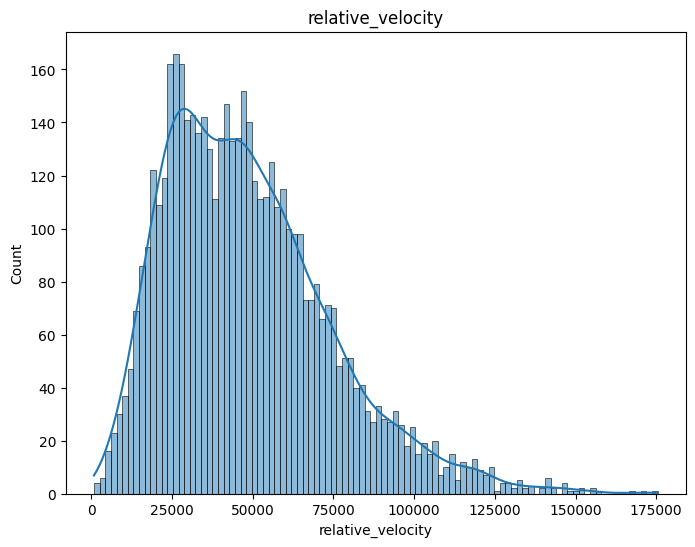

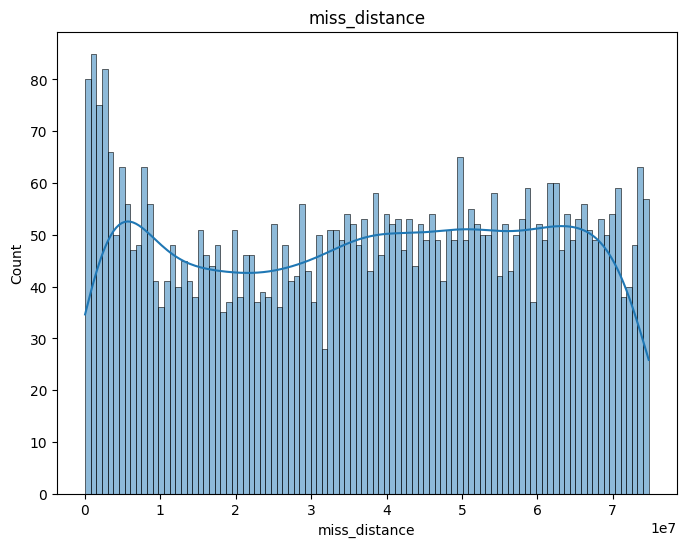

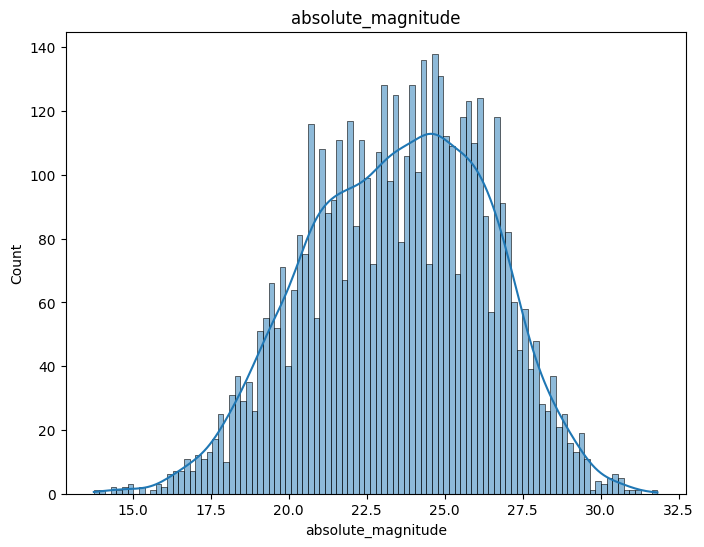

In [23]:
correct_4 = ['relative_velocity','miss_distance','absolute_magnitude']
for graf in correct_4:
    plt.figure(figsize=(8, 6))
    sns.histplot(data.sample(5000)[graf], bins=100, kde=True)
    plt.title(graf)

# Model training :

In [24]:
X = data.drop(['name'], axis=1)
X = X.drop(['hazardous'], axis=1)
X = X.drop(['id'], axis=1)
y= data['hazardous']
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40
...,...,...,...,...,...
90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90
90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90
90833,0.035039,0.078350,116288.999548,5.471396e+07,24.40
90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90


In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 88540, dtype: int32

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

Text(0, 0.5, 'Количество')

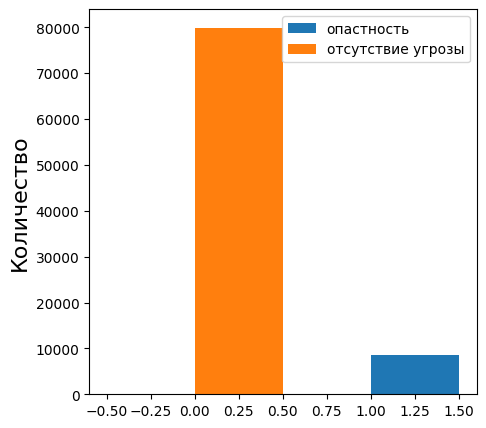

In [27]:
bins = 2
plt.figure(figsize = (5,5))

plt.hist(y.loc[y == 1], bins, label = 'опастность')

plt.hist(y.loc[y == 0], bins, label = 'отсутствие угрозы')


plt.legend()

plt.ylabel('Количество', fontsize = 16)

In [28]:
nm = NearMiss()
X_train, y_train  = nm.fit_resample(X_train,y_train )

Балансировка классов:

Text(0, 0.5, 'Количество ')

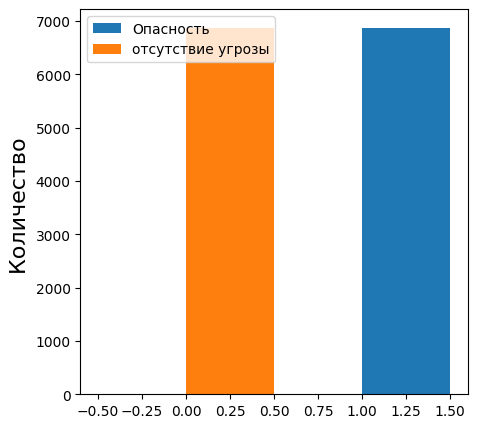

In [29]:
bins = 2
plt.figure(figsize = (5,5))

plt.hist(y_train.loc[y_train == 1], bins, label = 'Опасность')

plt.hist(y_train.loc[y_train == 0], bins, label = 'отсутствие угрозы')


plt.legend()


plt.ylabel('Количество ', fontsize = 16)

## KNN:

In [30]:
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)),
    ]
)
pipe.fit(X_train, y_train)
y_knn_pred = pipe.predict(X_test)

In [31]:
X_train

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.076658,0.171412,32835.909255,1.854289e+07,22.70
1,0.023150,0.051765,30605.592438,1.854439e+07,25.30
2,0.008801,0.019681,60424.443717,7.385507e+07,27.40
3,0.121494,0.271669,47059.058740,4.204128e+07,21.70
4,0.069913,0.156329,34675.229018,7.737566e+06,22.90
...,...,...,...,...,...
13749,0.160160,0.358129,44665.533068,1.721816e+07,21.10
13750,0.321037,0.717860,58636.427764,4.332463e+07,19.59
13751,0.646480,1.445573,40089.762335,4.906573e+07,18.07
13752,0.104365,0.233367,55274.103884,6.078015e+07,22.03


In [32]:
with open("Knn.pickle", "wb") as file:
    pickle.dump(pipe, file)

In [33]:
confusion_matrix(y_test, y_knn_pred)

array([[11941,  4048],
       [  143,  1576]], dtype=int64)

In [34]:
print(f"Accuracy: {accuracy_score(y_test, y_knn_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_knn_pred)}")
print(f"F1 score: {f1_score(y_test, y_knn_pred)}")
print(f"Recall score: {recall_score(y_test, y_knn_pred)}")
print(f"Precision score: {precision_score(y_test, y_knn_pred)}")

Accuracy: 0.7633273096905353
ROC AUC score: 0.8318190214469365
F1 score: 0.4292523491760861
Recall score: 0.9168121000581734
Precision score: 0.2802275960170697


In [35]:
confusion_matrix(y_test, y_knn_pred)

array([[11941,  4048],
       [  143,  1576]], dtype=int64)

In [36]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85     15989
           1       0.28      0.92      0.43      1719

    accuracy                           0.76     17708
   macro avg       0.63      0.83      0.64     17708
weighted avg       0.92      0.76      0.81     17708



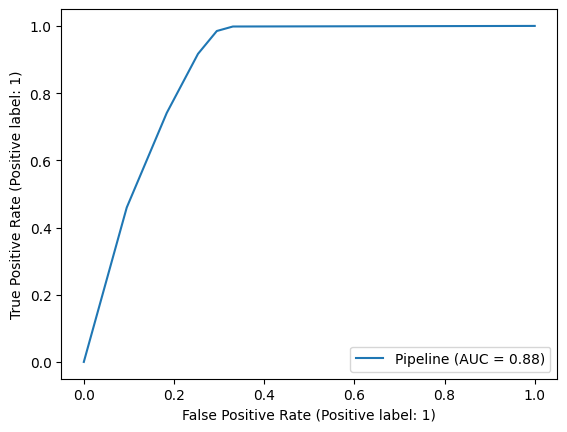

In [37]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)

## Naive Bayes :

In [38]:
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ('model', GaussianNB()),
    ]
)
pipe.fit(X_train, y_train)
y_knn_pred = pipe.predict(X_test)

In [39]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred)}")

Accuracy: 0.6697537836006325
ROC AUC score: 0.55233708340278
F1 score: 0.19293403256969363
Recall score: 0.40663176265270506
Precision score: 0.12647005608829384


In [40]:
confusion_matrix(y_test, y_pred)

array([[11161,  4828],
       [ 1020,   699]], dtype=int64)

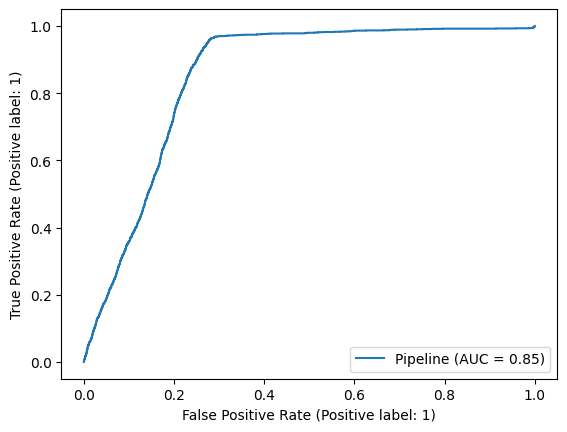

In [41]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)

## Logistic Regression

In [42]:
pipe = Pipeline(
    [('minmaxscaler', MinMaxScaler()), 
     ('model', LogisticRegression()) 
    ]
)
pipe.fit(X_train, y_train)

y_lr_pred=pipe.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_lr_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_lr_pred)}")
print(f"F1 score: {f1_score(y_test, y_lr_pred)}")
print(f"Recall score: {recall_score(y_test, y_lr_pred)}")
print(f"Precision score: {precision_score(y_test, y_lr_pred)}")

Accuracy: 0.792014908515925
ROC AUC score: 0.8409554656377162
F1 score: 0.4570249152292496
Recall score: 0.9016870273414777
Precision score: 0.3060821484992101


In [43]:
confusion_matrix(y_test, y_lr_pred)

array([[12475,  3514],
       [  169,  1550]], dtype=int64)

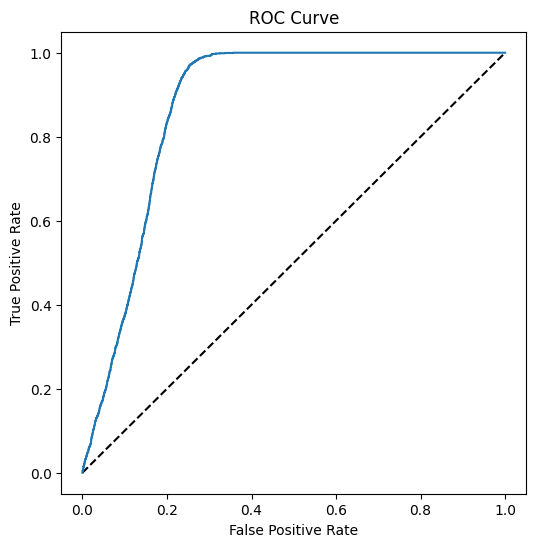

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline

y_scores = pipe.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## SVM

In [ ]:
def met(y_test, y_svml_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_svml_pred)}")
    print(f"ROC AUC score: {roc_auc_score(y_test, y_svml_pred)}")
    print(f"F1 score: {f1_score(y_test, y_svml_pred)}")
    print(f"Recall score: {recall_score(y_test, y_svml_pred)}")
    print(f"Precision score: {precision_score(y_test, y_svml_pred)}")


# Создаем экземпляр SVM и обучаем модель с использованием линейного ядра
C = 1.0  # параметр регуляризации SVM
linear_svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# Создаем экземпляр SVM и обучаем модель с использованием RBF-ядро
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# Создаем экземпляр SVM и обучаем модель с использованием полиномиального ядра
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)

# Создаем экземпляр SVM и обучаем модель с использованием сигмоидного ядра
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)

# оцениваем качество моделей
print('linear_svc')
met(y, linear_svc.predict(X))
print('poly_svc')
met(y, poly_svc.predict(X))
print('rbf_svc')
met(y, rbf_svc.predict(X))
print('sig_svc')
met(y, sig_svc.predict(X))

In [ ]:
confusion_matrix(y_test, y_lr_pred)

In [ ]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)

# Model classifiers

In [ ]:
classifiers = {
   
    'KNN classifier': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1),
    'Naive Bayes': GaussianNB(),
    'Logistic regression': LogisticRegression(random_state=0),
    "SVC":  LinearSVC(max_iter=10000)
    
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):

    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

# Задание 3

In [ ]:
def my_metrics(y_test, y_pred):
    y_test = y_test.reset_index(drop=True)
    y_pred = pd.Series(y_pred).reset_index(drop=True)
    compared = y_test == y_pred
    compared = compared.reset_index(drop=True)
    y_test = y_test.astype(bool).reset_index(drop=True)
    
    TP = (y_test & compared).sum()
    TN = (~y_test & compared).sum()
    FN = (y_test & ~compared).sum()
    FP = (~y_test & ~compared).sum()
    
    accuracy = (TP + TN)/(y_test.count())
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (2 * precision * recall) / (precision + recall)
    
    print('F1: ', f1)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)

In [ ]:
pipe = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ]
)
pipe.fit(X_train, y_train)
y_knn_pred = pipe.predict(X_test)
my_metrics(y_test, y_knn_pred)

In [ ]:
from statistics import mode
from math import sqrt

class myknn:
    def __init__(self, k=3,p=1,metric="minkowski"):
        self.k = k
        self.p = p
        self.metric=metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.reset_index(drop=True)

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
  
    def distance(self,data1,data2):
        distance = 0
        if(self.metric=="minkowski"):
            for i in range (len(data1) - 1):
                distance +=np.abs(data1[i] - data2[i])**self.p
            return sqrt(distance)
        elif(self.metric=="euclidean"):
            for i in range (len(data1) - 1):
                distance +=(data1[i] - data2[i])**2
            return sqrt(distance)
        elif(self.metric=="manhattan"):
            for i in range (len(data1) - 1):
                distance +=np.abs(data1[i] - data2[i])
            return sqrt(distance)
            
    
    def _predict(self, x):
        distances = [myknn.distance(self,x, x_train) for x_train in self.X_train]
        k_neighbors_indices = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]
        most_common = mode(k_neighbor_labels)
        return most_common

In [ ]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X.head(5000), y.head(5000), test_size=0.2)
user_knn = Pipeline([("scaler", MinMaxScaler()),
                 ("model", myknn(k=5,p=1,metric="manhattan"))])
user_knn.fit(Xh_train.values, yh_train)
user_knn_pred = user_knn.predict(Xh_test.values)

In [ ]:
print(classification_report(yh_test, user_knn_pred))

In [ ]:
confusion_matrix(yh_test, user_knn_pred)